In [1]:
import urllib

URL = "https://raw.githubusercontent.com/cbergmeir/Rlgt/master/Rlgt/src/stan_files/LGT.stan"
print(urllib.request.urlopen(URL).read().decode("utf-8"))

// non-seasonal Local and Global Trend (LGT) algorithm

data {  
	real<lower=0> CAUCHY_SD;
	real MIN_POW_TREND;  real MAX_POW_TREND;
	real<lower=0> MIN_SIGMA;
	real<lower=1> MIN_NU; real<lower=1> MAX_NU;
	int<lower=1> N;
	vector<lower=0>[N] y;
	real<lower=0> POW_TREND_ALPHA; real<lower=0> POW_TREND_BETA;
	int<lower=0,upper=1> USE_REGRESSION;
	int<lower=0,upper=1> USE_SMOOTHED_ERROR;
	int<lower=1> J;
	matrix[N, J] xreg;  
	vector<lower=0>[J] REG_CAUCHY_SD;
}
transformed data {
	real<lower=0> reg0CauchySd=mean(REG_CAUCHY_SD)*10;
}
parameters {
 	vector[J]  regCoef; real regOffset;
	real<lower=MIN_NU,upper=MAX_NU> nu; 
	real<lower=0> sigma;
	real <lower=0,upper=1>levSm;
	real <lower=0,upper=1> bSm;
	real <lower=0,upper=1> powx;
	real bInit;
	real <lower=0,upper=1> powTrendBeta;
	real coefTrend;
	real <lower=MIN_SIGMA> offsetSigma;
	real <lower=0,upper=1> locTrendFract;
	real <lower=0,upper=1>innovSm;
	real <lower=0> innovSizeInit;
} 
transformed parameters {
	real <lower=MIN_POW_TREND,upp

In [2]:
%load_ext rpy2.ipython

/home/fehiepsi/miniconda3/envs/test/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: Rcpp

  warnings.warn(x, RRuntimeWarning)
/home/fehiepsi/miniconda3/envs/test/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: rstantools

  warnings.warn(x, RRuntimeWarning)
/home/fehiepsi/miniconda3/envs/test/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: This is rstantools version 1.5.1

  warnings.warn(x, RRuntimeWarning)
/home/fehiepsi/miniconda3/envs/test/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: forecast

  warnings.warn(x, RRuntimeWarning)



SAMPLING FOR MODEL 'LGT' NOW (CHAIN 1).
Chain 1: Rejecting initial value:
Chain 1:   Error evaluating the log probability at the initial value.
Chain 1: Exception: model_LGT_namespace::write_array: expVal[13] is -248.669, but must be greater than or equal to 0  (in 'model_LGT' at line 40)

Chain 1: 
Chain 1: Gradient evaluation took 0.000216 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 2.16 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 9.84063 seconds (Warm-up)
Chain 1:                1.39751 seconds (Sampling)
Chain 1:                11.2

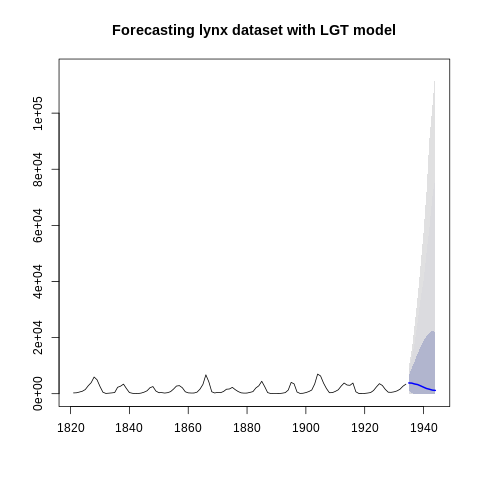

In [3]:
%%R
library(Rlgt)

rlgt_model <- rlgt(lynx,
                   control=rlgt.control(MAX_NUM_OF_REPEATS=1,
                                        NUM_OF_ITER=2000,
                                        NUM_OF_CHAINS=1,
                                        NUM_OF_CORES=1),
                   verbose=TRUE)
print(rlgt_model)
forecast_result <- forecast(rlgt_model, h=10, level=c(80, 95, 98))
plot(forecast_result, main="Forecasting lynx dataset with LGT model")